=== First 5 rows of the dataset ===
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

=== Dataset information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

=== Statistical summary ===
       sepal_length  sepal_wid

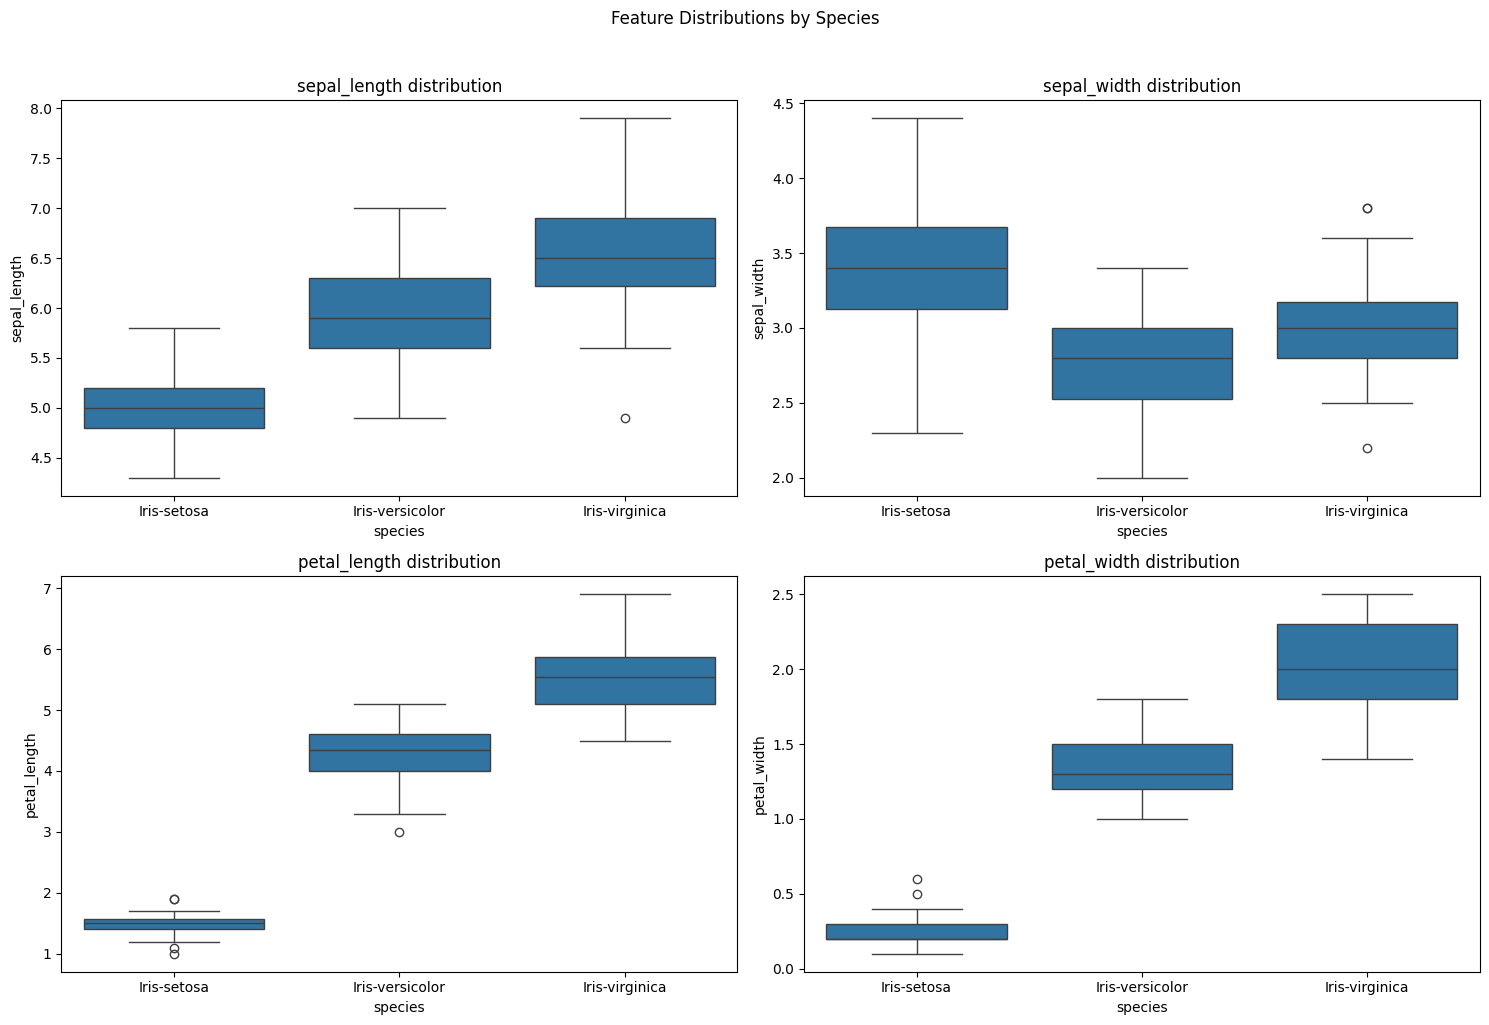

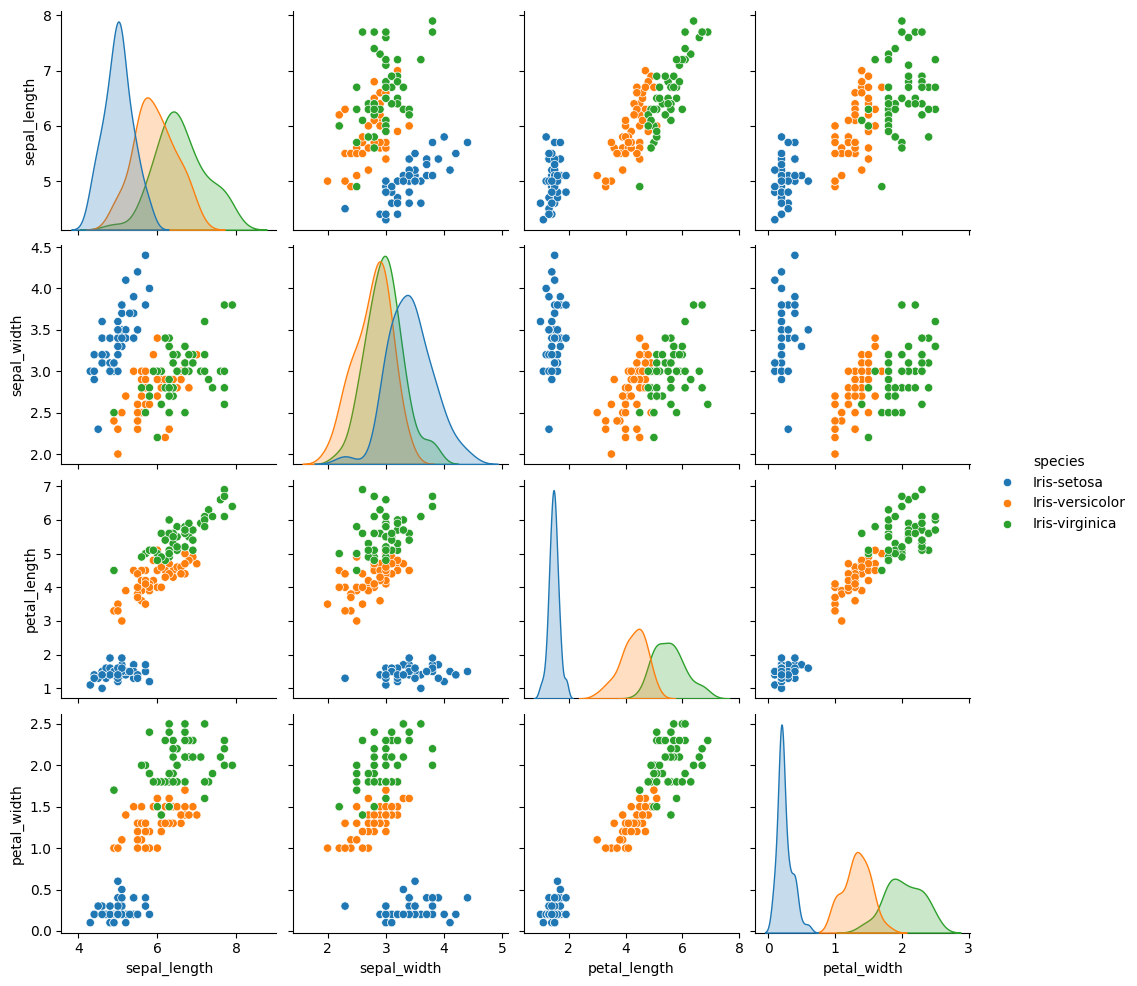


=== Model Accuracy: 1.0000 ===

=== Classification Report ===
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


=== Confusion Matrix ===
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


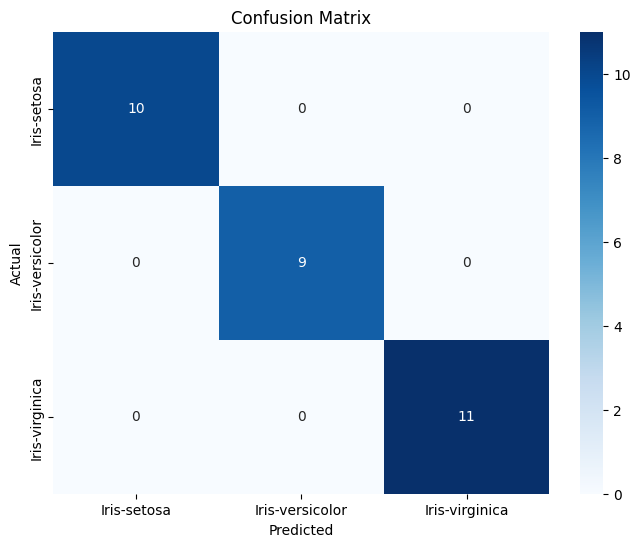


=== Feature Importance ===
        Feature  Importance
2  petal_length    0.439994
3   petal_width    0.421522
0  sepal_length    0.108098
1   sepal_width    0.030387


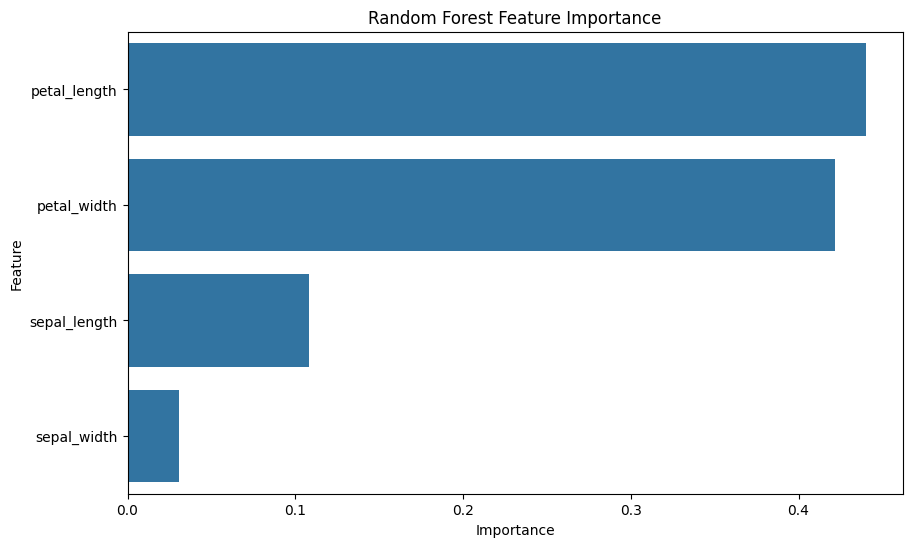


=== Sample Prediction ===
Input measurements: [5.1, 3.5, 1.4, 0.2]
Predicted species: Iris-setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
iris_df = pd.read_csv('IRIS.csv')

# 1. Exploratory Data Analysis (EDA)
print("=== First 5 rows of the dataset ===")
print(iris_df.head())

print("\n=== Dataset information ===")
print(iris_df.info())

print("\n=== Statistical summary ===")
print(iris_df.describe())

print("\n=== Class distribution ===")
print(iris_df['species'].value_counts())

# Visualize the distribution of features
plt.figure(figsize=(15, 10))
plt.suptitle("Feature Distributions by Species", y=1.02)

for i, feature in enumerate(iris_df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=iris_df)
    plt.title(f'{feature} distribution')
plt.tight_layout()
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(iris_df, hue='species')
plt.show()

# 2. Data Preprocessing
# Encode the target variable
label_encoder = LabelEncoder()
iris_df['species'] = label_encoder.fit_transform(iris_df['species'])

# Split into features (X) and target (y)
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Random Forest Model
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# 4. Model Evaluation
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n=== Model Accuracy: {accuracy:.4f} ===")

# Classification report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
print("\n=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 5. Feature Importance
# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n=== Feature Importance ===")
print(feature_importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Random Forest Feature Importance')
plt.show()

# 6. Example Prediction
# Create a sample flower measurement (sepal_length, sepal_width, petal_length, petal_width)
sample_flower = [[5.1, 3.5, 1.4, 0.2]]  # Iris-setosa
predicted_class = rf_model.predict(sample_flower)
predicted_species = label_encoder.inverse_transform(predicted_class)
print(f"\n=== Sample Prediction ===")
print(f"Input measurements: {sample_flower[0]}")
print(f"Predicted species: {predicted_species[0]}")